In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")

print("Path to dataset files:", path)

Path to dataset files: /home/mw/.cache/kagglehub/datasets/uciml/adult-census-income/versions/3


In [3]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.autograd.set_detect_anomaly(True)

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import torch

# Load and clean the data
data = pd.read_csv("/home/mw/.cache/kagglehub/datasets/uciml/adult-census-income/versions/3/adult.csv")
data = data.dropna()
print(data.columns)
data.columns = data.columns.str.strip()
data.head()


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

# Apply one-hot encoding for categorical columns
for col in categorical_columns:
    if data[col].nunique() <= 2:
        data[col] = LabelEncoder().fit_transform(data[col])
    else:
        one_hot = pd.get_dummies(data[col], prefix=col)
        data = pd.concat([data.drop(col, axis=1), one_hot], axis=1)

boolean_columns = data.select_dtypes(include='bool').columns
data[boolean_columns] = data[boolean_columns].astype(int)           
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,1.000000,0.043987,0.533333,0.0,0.0,1.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,0.0,1.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.136986,0.166404,0.733333,0.0,0.0,0.000000,0.377551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.315068,0.096500,0.533333,1.0,0.0,0.000000,0.397959,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import torch

target_column = 'income'
X = data.drop(columns=target_column)
y = data[target_column]


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors after converting to NumPy array
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
0
# Display the tensor shapes to confirm
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_val_tensor shape:", X_val_tensor.shape)
print("y_val_tensor shape:", y_val_tensor.shape)



X_train_tensor shape: torch.Size([26048, 107])
y_train_tensor shape: torch.Size([26048])
X_val_tensor shape: torch.Size([6513, 107])
y_val_tensor shape: torch.Size([6513])


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim, condition_dim):
        super(Encoder, self).__init__()
        
        self.fc1 = nn.Linear(input_dim + condition_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc_mean = nn.Linear(128, latent_dim)
        self.fc_log_var = nn.Linear(128, latent_dim)
        self.LeakyRelu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x, condition):
        # print("x ", x.shape)
        x = torch.cat([x, condition], dim=-1)  # Concatenate the condition to the input
        # print("concat :",x.shape )
        x = self.LeakyRelu(self.fc1(x))
        x = self.dropout(self.LeakyRelu(self.fc2(x)))
        x = self.LeakyRelu(self.fc3(x))
        mean = self.fc_mean(x)
        log_var = self.fc_log_var(x)
        return mean, log_var

In [8]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(Decoder, self).__init__()
        
        self.fc1 = nn.Linear(latent_dim + condition_dim, 128)  # Latent + condition
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc_output = nn.Linear(512, output_dim)
        self.lrelu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, z, condition):
        z = torch.cat([z, condition], dim=-1)  # Concatenate the condition to the latent
        z = self.lrelu(self.fc1(z))
        z = self.dropout(self.lrelu(self.fc2(z)))
        z = self.lrelu(self.fc3(z))
        reconstructed_x = self.sigmoid(self.fc_output(z))
        return reconstructed_x

In [9]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim, condition_dim,beta = 0.1):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, latent_dim, condition_dim)
        self.decoder = Decoder(latent_dim, input_dim, condition_dim)
        self.beta = nn.Parameter(torch.tensor(0.1))

    def forward(self, x, condition):
        mu, log_var = self.encoder(x, condition)
        z = self.reparameterize(mu, log_var)
        reconstructed_x = self.decoder(z, condition)
        return reconstructed_x, mu, log_var

    @staticmethod
    def reparameterize(mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

In [10]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).unsqueeze(1)  # Add an extra dimension
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long).unsqueeze(1)  
print(y_train_tensor.shape)
print(X_train_tensor.shape)

torch.Size([26048, 1])
torch.Size([26048, 107])


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tensor = torch.tensor(scaler.fit_transform(X_train_tensor), dtype=torch.float32)
X_val_tensor = torch.tensor(scaler.transform(X_val_tensor), dtype=torch.float32)


  1%|          | 1/100 [00:02<03:56,  2.39s/it]

Epoch [1/100], Train Loss: 182.1144, Val Loss: 18.3167


  2%|▏         | 2/100 [00:04<03:27,  2.12s/it]

Epoch [2/100], Train Loss: 38.4504, Val Loss: 11.0379


  3%|▎         | 3/100 [00:06<03:10,  1.96s/it]

Epoch [3/100], Train Loss: 34.8166, Val Loss: 9.3135


  4%|▍         | 4/100 [00:07<03:02,  1.90s/it]

Epoch [4/100], Train Loss: 33.7154, Val Loss: 8.6304


  5%|▌         | 5/100 [00:09<02:55,  1.85s/it]

Epoch [5/100], Train Loss: 33.3448, Val Loss: 8.3658


  6%|▌         | 6/100 [00:11<02:51,  1.82s/it]

Epoch [6/100], Train Loss: 33.2512, Val Loss: 8.2918


  7%|▋         | 7/100 [00:13<02:47,  1.80s/it]

Epoch [7/100], Train Loss: 33.2277, Val Loss: 8.2687


  8%|▊         | 8/100 [00:14<02:43,  1.78s/it]

Epoch [8/100], Train Loss: 33.2121, Val Loss: 8.2606


  9%|▉         | 9/100 [00:16<02:40,  1.77s/it]

Epoch [9/100], Train Loss: 33.1998, Val Loss: 8.2527


 10%|█         | 10/100 [00:18<02:38,  1.76s/it]

Epoch [10/100], Train Loss: 33.1622, Val Loss: 8.2368


 11%|█         | 11/100 [00:20<02:37,  1.77s/it]

Epoch [11/100], Train Loss: 32.9969, Val Loss: 8.1675


 12%|█▏        | 12/100 [00:21<02:34,  1.76s/it]

Epoch [12/100], Train Loss: 32.8255, Val Loss: 8.1547


 13%|█▎        | 13/100 [00:23<02:32,  1.76s/it]

Epoch [13/100], Train Loss: 32.7970, Val Loss: 8.1512


 14%|█▍        | 14/100 [00:25<02:31,  1.76s/it]

Epoch [14/100], Train Loss: 32.7759, Val Loss: 8.1483


 15%|█▌        | 15/100 [00:27<02:28,  1.75s/it]

Epoch [15/100], Train Loss: 32.7848, Val Loss: 8.1457


 16%|█▌        | 16/100 [00:28<02:27,  1.75s/it]

Epoch [16/100], Train Loss: 32.7735, Val Loss: 8.1439


 17%|█▋        | 17/100 [00:30<02:25,  1.76s/it]

Epoch [17/100], Train Loss: 32.7784, Val Loss: 8.1423


 18%|█▊        | 18/100 [00:32<02:23,  1.75s/it]

Epoch [18/100], Train Loss: 32.7613, Val Loss: 8.1411


 19%|█▉        | 19/100 [00:34<02:21,  1.74s/it]

Epoch [19/100], Train Loss: 32.7604, Val Loss: 8.1405


 20%|██        | 20/100 [00:35<02:20,  1.76s/it]

Epoch [20/100], Train Loss: 32.7654, Val Loss: 8.1384


 21%|██        | 21/100 [00:37<02:18,  1.75s/it]

Epoch [21/100], Train Loss: 32.7545, Val Loss: 8.1382


 22%|██▏       | 22/100 [00:39<02:16,  1.75s/it]

Epoch [22/100], Train Loss: 32.7609, Val Loss: 8.1372


 23%|██▎       | 23/100 [00:41<02:14,  1.74s/it]

Epoch [23/100], Train Loss: 32.7518, Val Loss: 8.1359


 24%|██▍       | 24/100 [00:42<02:12,  1.75s/it]

Epoch [24/100], Train Loss: 32.7508, Val Loss: 8.1353


 25%|██▌       | 25/100 [00:44<02:09,  1.72s/it]

Epoch [25/100], Train Loss: 32.7674, Val Loss: 8.1341


 26%|██▌       | 26/100 [00:46<02:07,  1.73s/it]

Epoch [26/100], Train Loss: 32.7435, Val Loss: 8.1340


 27%|██▋       | 27/100 [00:47<02:05,  1.71s/it]

Epoch [27/100], Train Loss: 32.7570, Val Loss: 8.1330


 28%|██▊       | 28/100 [00:49<02:05,  1.75s/it]

Epoch [28/100], Train Loss: 32.7488, Val Loss: 8.1323


 29%|██▉       | 29/100 [00:51<02:06,  1.79s/it]

Epoch [29/100], Train Loss: 32.7683, Val Loss: 8.1443


 30%|███       | 30/100 [00:53<02:02,  1.76s/it]

Epoch [30/100], Train Loss: 32.7566, Val Loss: 8.1315


 31%|███       | 31/100 [00:55<02:00,  1.75s/it]

Epoch [31/100], Train Loss: 32.7446, Val Loss: 8.1303


 32%|███▏      | 32/100 [00:56<02:00,  1.77s/it]

Epoch [32/100], Train Loss: 32.7541, Val Loss: 8.1299


 33%|███▎      | 33/100 [00:58<01:58,  1.76s/it]

Epoch [33/100], Train Loss: 32.7405, Val Loss: 8.1295


 34%|███▍      | 34/100 [01:00<01:57,  1.78s/it]

Epoch [34/100], Train Loss: 32.7465, Val Loss: 8.1295


 35%|███▌      | 35/100 [01:02<01:54,  1.77s/it]

Epoch [35/100], Train Loss: 32.7500, Val Loss: 8.1296


 36%|███▌      | 36/100 [01:03<01:52,  1.75s/it]

Epoch [36/100], Train Loss: 32.7505, Val Loss: 8.1286


 37%|███▋      | 37/100 [01:05<01:48,  1.73s/it]

Epoch [37/100], Train Loss: 32.7391, Val Loss: 8.1292


 38%|███▊      | 38/100 [01:07<01:46,  1.71s/it]

Epoch [38/100], Train Loss: 32.7446, Val Loss: 8.1276


 39%|███▉      | 39/100 [01:09<01:46,  1.74s/it]

Epoch [39/100], Train Loss: 32.7479, Val Loss: 8.1279


 40%|████      | 40/100 [01:10<01:45,  1.75s/it]

Epoch [40/100], Train Loss: 32.7504, Val Loss: 8.1275


 41%|████      | 41/100 [01:12<01:42,  1.74s/it]

Epoch [41/100], Train Loss: 32.7388, Val Loss: 8.1273


 42%|████▏     | 42/100 [01:14<01:41,  1.75s/it]

Epoch [42/100], Train Loss: 32.7509, Val Loss: 8.1270


 43%|████▎     | 43/100 [01:16<01:38,  1.73s/it]

Epoch [43/100], Train Loss: 32.7458, Val Loss: 8.1273


 44%|████▍     | 44/100 [01:17<01:36,  1.72s/it]

Epoch [44/100], Train Loss: 32.7352, Val Loss: 8.1274


 45%|████▌     | 45/100 [01:19<01:35,  1.74s/it]

Epoch [45/100], Train Loss: 32.7376, Val Loss: 8.1269


 46%|████▌     | 46/100 [01:21<01:33,  1.73s/it]

Epoch [46/100], Train Loss: 32.7443, Val Loss: 8.1269


 47%|████▋     | 47/100 [01:22<01:31,  1.72s/it]

Epoch [47/100], Train Loss: 32.7460, Val Loss: 8.1267


 48%|████▊     | 48/100 [01:24<01:28,  1.71s/it]

Epoch [48/100], Train Loss: 32.7441, Val Loss: 8.1271


 49%|████▉     | 49/100 [01:26<01:26,  1.69s/it]

Epoch [49/100], Train Loss: 32.7454, Val Loss: 8.1271


 50%|█████     | 50/100 [01:27<01:24,  1.68s/it]

Epoch [50/100], Train Loss: 32.7405, Val Loss: 8.1264


 51%|█████     | 51/100 [01:29<01:21,  1.67s/it]

Epoch [51/100], Train Loss: 32.7469, Val Loss: 8.1266


 52%|█████▏    | 52/100 [01:31<01:19,  1.66s/it]

Epoch [52/100], Train Loss: 32.7507, Val Loss: 8.1264


 53%|█████▎    | 53/100 [01:32<01:17,  1.66s/it]

Epoch [53/100], Train Loss: 32.7399, Val Loss: 8.1268


 53%|█████▎    | 53/100 [01:34<01:23,  1.78s/it]

Epoch [54/100], Train Loss: 32.7438, Val Loss: 8.1264
Early stopping triggered due to no improvement in validation loss.


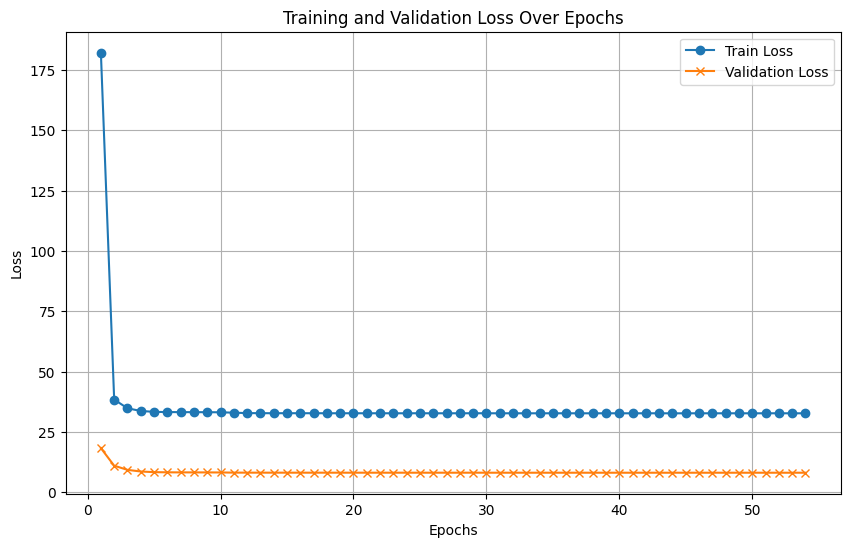

In [12]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming `features_tensor` and `target_tensor` are prepared and available
condition_dim = y_train_tensor.shape[1]  # Example: number of classes or other categorical input
input_dim = X_train_tensor.shape[1]
latent_dim = 100
beta = 0.1

# Define the VAE model (ensure that your model can handle `condition_dim` as input)
vae = VAE(input_dim, latent_dim, condition_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae.to(device)

optimizer = optim.Adam(vae.parameters(), lr=1e-4, weight_decay=1e-5)
reconstruction_loss_fn = nn.SmoothL1Loss(reduction='mean')

# Define the VAE loss function
def vae_loss(reconstructed_x, x, mu, log_var, beta=1.0):
    reconstruction_loss = reconstruction_loss_fn(reconstructed_x, x)
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    kl_divergence = torch.clamp(kl_divergence, min=0)  # Avoid invalid values
    return reconstruction_loss + beta * kl_divergence  # Apply beta scaling

# Convert to TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

# Training loop
num_epochs = 100
train_losses = []
val_losses = []

patience = 10  # Number of epochs without improvement before stopping
best_loss = float('inf')
epochs_without_improvement = 0 

for epoch in tqdm(range(num_epochs)):
    # Training phase
    vae.train()
    epoch_train_loss = 0
    for batch in train_loader:
        features, conditions = batch
        features = features.to(device)
        conditions = conditions.to(device)
        reconstructed_x, mu, log_var = vae(features, conditions)

        loss = vae_loss(reconstructed_x, features, mu, log_var, beta)
        if torch.isnan(loss) or torch.isinf(loss):
            print("NaN/Inf detected in loss. Skipping this batch.")
            continue

        epoch_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(vae.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()

    train_losses.append(epoch_train_loss)
    if epoch_train_loss < best_loss:
        best_loss = epoch_train_loss
        epochs_without_improvement = 0  # Reset counter
        # Save model checkpoint when there's an improvement
        torch.save(vae.state_dict(), "best_vae_lrelu_model.pth")
    else:
        epochs_without_improvement += 1

    # print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_train_loss:.4f}")

    # Validation phase
    vae.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            features, conditions = batch
            features = features.to(device)
            conditions = conditions.to(device)
            reconstructed_x, mu, log_var = vae(features, conditions)

            loss = vae_loss(reconstructed_x, features, mu, log_var)
            epoch_val_loss += loss.item()

    val_losses.append(epoch_val_loss)

    tqdm.write(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

    # Early stopping condition
    if epochs_without_improvement >= patience:
        print("Early stopping triggered due to no improvement in validation loss.")
        break

# Plotting training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 2. Make Predictions
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)

# 3. Calculate Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Display the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.9999616093366094
Validation Accuracy: 0.8113004759711346


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Train the Logistic Regression Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# 2. Make Predictions
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

# 3. Calculate Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Display the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.8514281326781327
Validation Accuracy: 0.8481498541378781


In [15]:
import torch

# Reinitialize the VAE with the same architecture as used during training
vae = VAE(input_dim, latent_dim, condition_dim)  # Ensure these dimensions match your training setup
vae.load_state_dict(torch.load("best_vae_lrelu_model.pth"))
vae.eval()  # Set the model to evaluation mode
vae.to(device)  

/tmp/ipykernel_2992/585296845.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae.load_state_dict(torch.load("best_vae_lrelu_model.pth"))


VAE(
  (encoder): Encoder(
    (fc1): Linear(in_features=108, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=128, bias=True)
    (fc_mean): Linear(in_features=128, out_features=100, bias=True)
    (fc_log_var): Linear(in_features=128, out_features=100, bias=True)
    (LeakyRelu): LeakyReLU(negative_slope=0.01)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=101, out_features=128, bias=True)
    (fc2): Linear(in_features=128, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=512, bias=True)
    (fc_output): Linear(in_features=512, out_features=107, bias=True)
    (lrelu): LeakyReLU(negative_slope=0.01)
    (sigmoid): Sigmoid()
    (dropout): Dropout(p=0.2, inplace=False)
  )
)

In [16]:
import torch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you already have the VAE model loaded and the latent_dim, condition_dim, and device defined

# Number of samples to generate
num_samples = 1000
# latent_dim = 20  # Adjust based on your model's latent space
# condition_dim = 10  # Number of classes, adjust accordingly

# Sample from a standard normal distribution (mean=0, std=1) in the latent space
z = torch.randn(num_samples, latent_dim).to(device)
print(z.shape)
# Generate random class labels (conditions)
# conditions = torch.randint(0, condition_dim, (num_samples,)).to(device)  # Random class labels4
condition_column = data['income'].values  # Replace with your actual condition column
conditions = torch.tensor(condition_column, dtype=torch.long).to(device)  # Use actual conditions
conditions_onehot = torch.nn.functional.one_hot(conditions, num_classes=condition_dim).float()  # One-hot encode

# Generate synthetic dataconditions = torch.tensor(condition_column, dtype=torch.long).to(device)  # Use actual conditions
with torch.no_grad():
    # Pass through the decoder (vae.decoder should be defined in your model)
    generated_data = vae.decoder(z,conditions)  # Assuming no condition for simplicity; modify if conditional

# Convert generated data to CPU and numpy for compatibility with scikit-learn
generated_data_np = generated_data.cpu().numpy()
conditions_np = conditions_onehot.cpu().numpy()

# Combine the generated data with conditions to form the feature matrix
X_generated = torch.cat((generated_data, conditions_onehot), dim=1).cpu().numpy()

# Assuming you have labels for the generated data or generate some dummy labels
y_generated = torch.randint(0, 2, (num_samples,)).cpu().numpy()  # Dummy binary labels for illustration


torch.Size([1000, 100])


RuntimeError: Tensors must have same number of dimensions: got 2 and 1

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_generated, y_generated, test_size=0.2, random_state=42)

# Instantiate the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree on the generated data
dt.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = dt.predict(X_val)

# Evaluate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
